In [1]:
import numpy as np
import matplotlib.pyplot as pp

(array([11., 17., 20., 25., 26., 29., 31., 30., 31., 31., 32., 30., 31.,
        29., 28., 26., 24., 22., 17., 10.]),
 array([-62.32400458, -56.06142499, -49.7988454 , -43.53626581,
        -37.27368623, -31.01110664, -24.74852705, -18.48594746,
        -12.22336787,  -5.96078828,   0.30179131,   6.5643709 ,
         12.82695048,  19.08953007,  25.35210966,  31.61468925,
         37.87726884,  44.13984843,  50.40242802,  56.6650076 ,
         62.92758719]),
 <BarContainer object of 20 artists>)

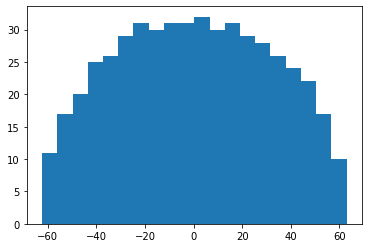

In [2]:
mat = np.random.normal(size=(500,500))
mat = mat + np.transpose(mat)

vals,vecs = np.linalg.eig(mat)

pp.hist(vals, bins=20)

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

uCities = np.unique(data.City)
years = pd.DatetimeIndex(data.dt).year
months = pd.DatetimeIndex(data.dt).month
uYears = np.unique(years)

for y in uYears:
    nc = data.AverageTemperature[(years == y) & (months == 7)]
    nc = sum(np.isfinite(nc))
    print(y, nc)

1743 0
1744 13
1745 0
1746 0
1747 0
1748 0
1749 0
1750 13
1751 13
1752 0
1753 14
1754 14
1755 11
1756 15
1757 15
1758 15
1759 15
1760 11
1761 14
1762 14
1763 11
1764 15
1765 15
1766 15
1767 15
1768 15
1769 15
1770 15
1771 15
1772 15
1773 15
1774 16
1775 15
1776 16
1777 16
1778 12
1779 14
1780 15
1781 15
1782 15
1783 15
1784 15
1785 16
1786 16
1787 16
1788 15
1789 16
1790 16
1791 18
1792 18
1793 17
1794 17
1795 17
1796 34
1797 34
1798 34
1799 34
1800 34
1801 34
1802 34
1803 34
1804 34
1805 34
1806 34
1807 34
1808 17
1809 20
1810 20
1811 20
1812 20
1813 37
1814 37
1815 37
1816 40
1817 40
1818 38
1819 41
1820 41
1821 49
1822 49
1823 49
1824 46
1825 51
1826 47
1827 47
1828 47
1829 49
1830 47
1831 47
1832 52
1833 56
1834 56
1835 57
1836 55
1837 59
1838 54
1839 60
1840 66
1841 72
1842 72
1843 74
1844 67
1845 71
1846 70
1847 70
1848 70
1849 74
1850 83
1851 84
1852 81
1853 82
1854 82
1855 83
1856 84
1857 83
1858 80
1859 86
1860 80
1861 82
1862 63
1863 67
1864 74
1865 77
1866 79
1867 74
1868 80

the above shows that there's data for all cities for years 1891 to 2013 (inclusive)

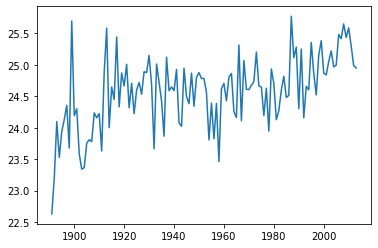

In [5]:
goodYears = np.arange(1891, 2014)
nc = len(uCities)
ny = len(goodYears)

mat = np.array([data.AverageTemperature[ (data.City == c) & (months == 7) & (years >= 1891) & (years <= 2013) ].to_numpy() for c in uCities])

pp.plot(goodYears, mat[0])

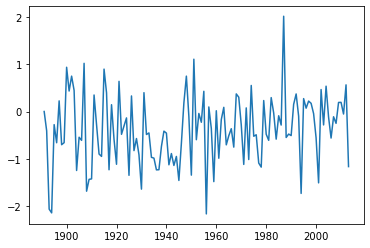

In [6]:
for row in mat:
    row -= row[0]
pp.plot(goodYears, mat[2])

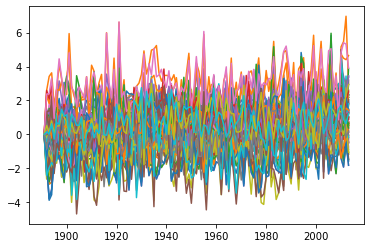

In [7]:
for row in mat:
    pp.plot(goodYears, row)

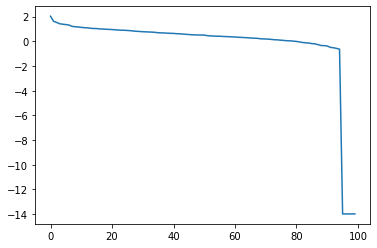

In [8]:
u,s,vt = np.linalg.svd(mat, full_matrices=False)
pp.plot(np.log10(s))

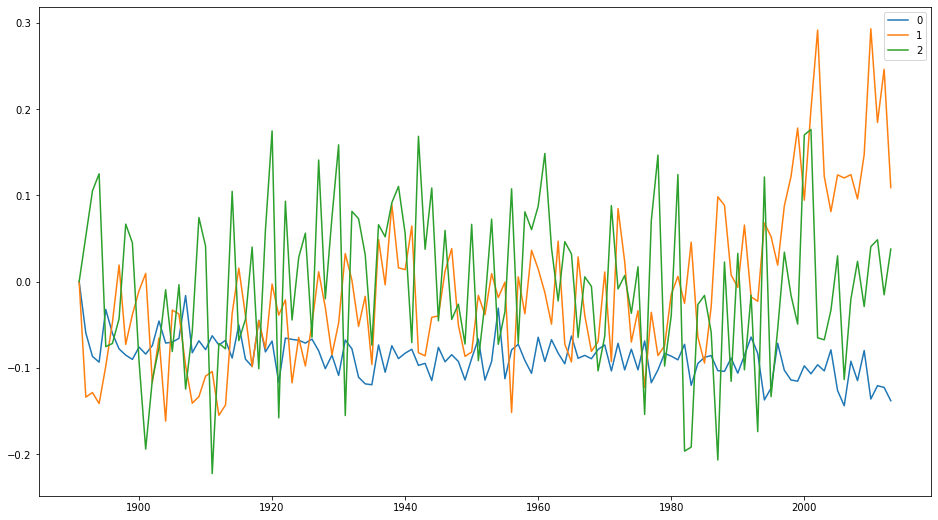

In [9]:
pp.figure(figsize=(16,9))
for i in range(3):
    pp.plot(goodYears, vt[i])
pp.legend(range(3))

Here's a real PCA done with SVD

In [10]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd

data = pd.read_csv("players_stats_by_season_full_details.csv")

print(data.columns)

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team'],
      dtype='object')


In [11]:
matrix = data.loc[:,'GP':'PTS'].to_numpy()
print( np.where(data.columns == 'GP') )
print( np.where(data.columns == 'PTS') )

(array([5]),)
(array([21]),)


In [12]:
labels = data.columns[5:22].to_numpy()
print(labels)

['GP' 'MIN' 'FGM' 'FGA' '3PM' '3PA' 'FTM' 'FTA' 'TOV' 'PF' 'ORB' 'DRB'
 'REB' 'AST' 'STL' 'BLK' 'PTS']


In [13]:
nmat = np.zeros(np.shape(matrix))
for i in range(np.shape(matrix)[1]):
    col = matrix[:,i]
    col -= np.min(col)
    col /= np.max(col)
    col -= np.mean(col)
    nmat[:,i] = col
nmat[0]    

array([ 0.57960031,  0.69169831,  0.86175814,  0.65343077, -0.07081725,
       -0.07756652,  0.49696124,  0.76953424,  0.37874895,  0.49837995,
        0.68562489,  0.72863399,  0.76429329,  0.2553655 ,  0.0412649 ,
        0.74432555,  0.71780425])

(1, 200)

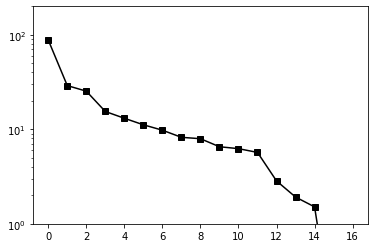

In [14]:
u,s,vt = np.linalg.svd(nmat, full_matrices=False)
pp.plot(s, 'ks-')
pp.yscale("log")
pp.ylim([1,200])

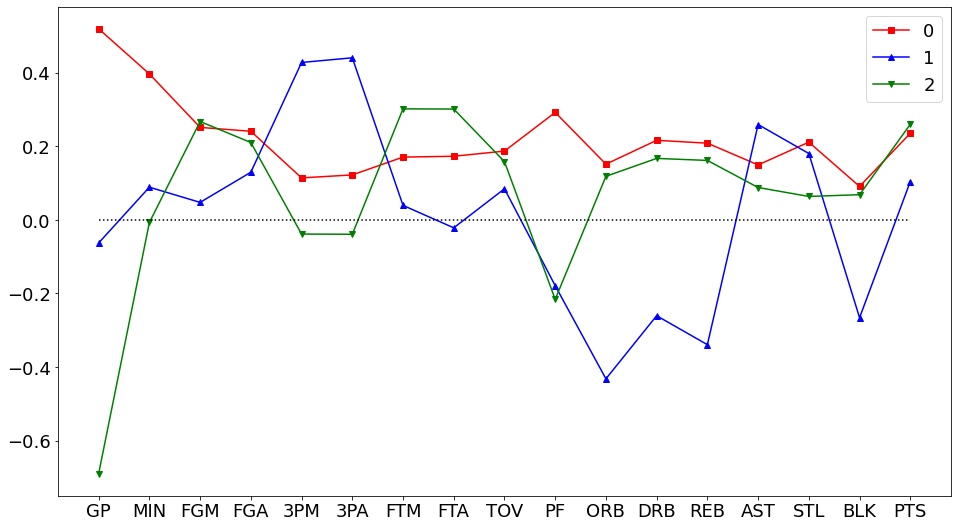

In [15]:
fig = pp.figure(figsize=(16,9))
pp.plot(-vt[0], 'rs-', vt[1], 'b^-', -vt[2], 'gv-', vt[0]*0, 'k:')
pp.xticks(np.arange(len(labels)), labels, fontsize=18)
pp.yticks(fontsize=18)
pp.legend(np.arange(3), fontsize=18)